IMport

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airlines_flights_data.csv")

In [ ]:
df.sample(15)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
241621,Air_India,AI-687,Mumbai,Afternoon,one,Morning,Chennai,Business,16.92,4,57554
123595,Air_India,AI-747,Kolkata,Night,one,Night,Delhi,Economy,24.67,26,7900
26488,GO_FIRST,G8-713,Delhi,Evening,one,Morning,Kolkata,Economy,12.75,37,5418
158828,GO_FIRST,G8-424,Hyderabad,Early_Morning,one,Evening,Mumbai,Economy,10.08,4,12143
146606,Vistara,UK-778,Kolkata,Afternoon,one,Afternoon,Hyderabad,Economy,21.25,37,6075
129901,GO_FIRST,G8-227,Kolkata,Early_Morning,one,Evening,Mumbai,Economy,13.08,17,7958
196425,Vistara,UK-822,Chennai,Morning,one,Early_Morning,Bangalore,Economy,22.08,34,4755
286897,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Chennai,Business,7.00,35,41314
296435,Air_India,AI-538,Chennai,Night,one,Evening,Kolkata,Business,22.83,13,55377
843,GO_FIRST,G8-2401,Delhi,Morning,one,Evening,Mumbai,Economy,8.00,6,11179


In [ ]:
df.shape

(300153, 12)

In [ ]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df[df['price']==123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


TO find missing values

In [ ]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
# remove to index col

df.drop(columns= 'index', inplace = True)

# 1. Analyze flight frequency by airline

/tmp/ipython-input-1049905465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="airline", order=df["airline"].value_counts().index, palette="viridis")


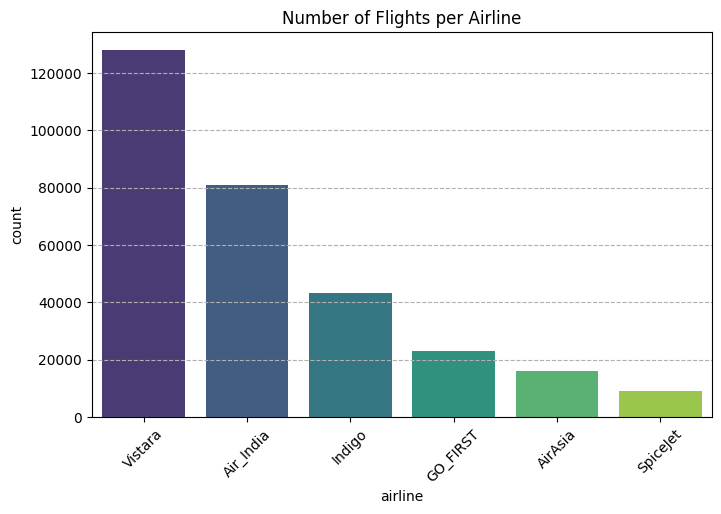

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="airline", order=df["airline"].value_counts().index, palette="viridis")
plt.title("Number of Flights per Airline")
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle="--")
plt.show()



#2. Examine how flight volume varies between different arrival and departure times to reveal scheduling patterns and peak hours.

In [ ]:
# Departure Time

df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
# Arrivel time

df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


Plot arrival_time V/s departure_time

Text(0, 0.5, 'A_Frequency')

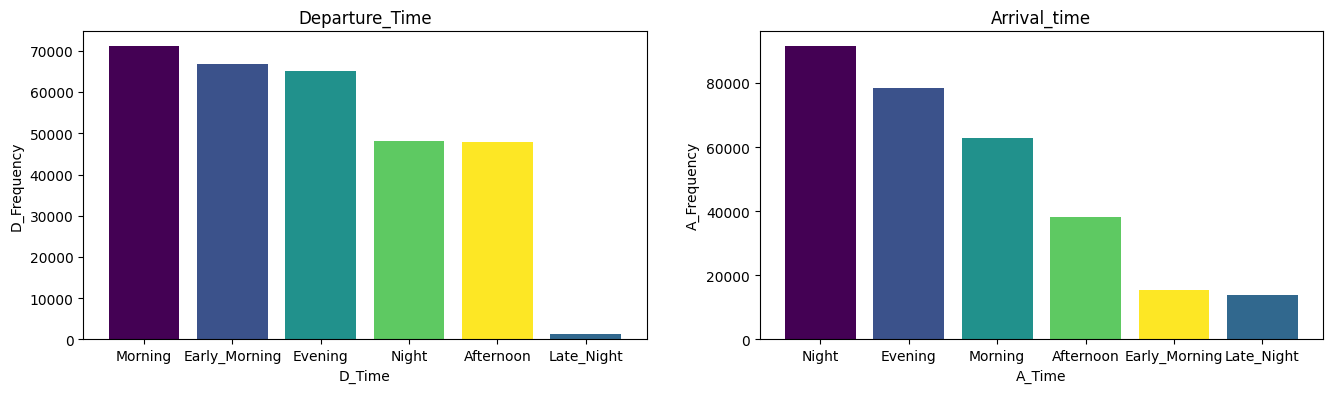

In [ ]:
co = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#31688e']

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.bar(df['departure_time'].value_counts().index, df['departure_time'].value_counts().values,
        color= co)
plt.title("Departure_Time")
plt.xlabel("D_Time")
plt.ylabel("D_Frequency")

# ------------------------------------------------------------------------------------------------------------------------

plt.subplot(1,2,2)
plt.bar(df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values,
        color= co)
plt.title("Arrival_time")
plt.xlabel("A_Time")
plt.ylabel("A_Frequency")

#3. Determine the volume of flights associated with each city.

In [ ]:
# Source city

df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
# destination_city

df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


source_city V/s destination_city

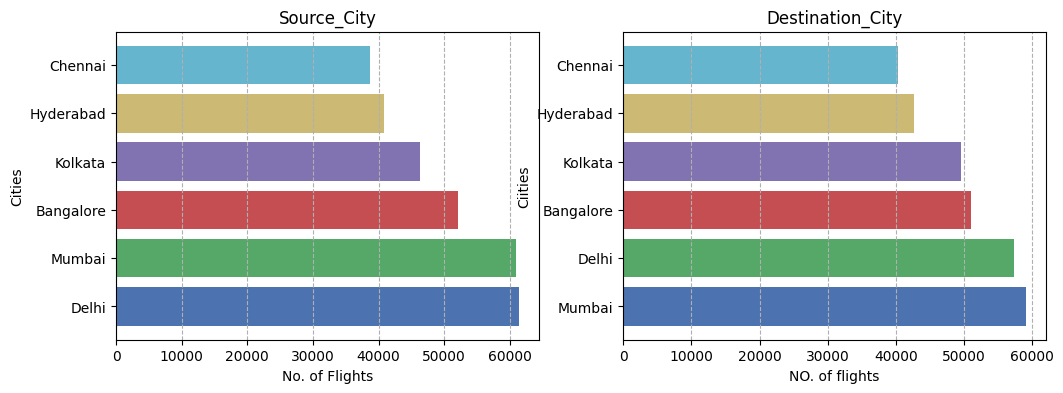

In [ ]:
plt.figure(figsize=(12,4))

co = [ "#4C72B0", "#55A868",  "#C44E52",  "#8172B2", "#CCB974","#64B5CD"]

plt.subplot(1,2,1)
plt.barh(df['source_city'].value_counts().index,df['source_city'].value_counts().values,
         color = co)
plt.title("Source_City")
plt.xlabel("No. of Flights")
plt.ylabel("Cities")
plt.grid(axis='x',linestyle="--")

# ------------------------------------------------------------------------------------------------------------------

plt.subplot(1,2,2)
plt.barh(df['destination_city'].value_counts().index, df['destination_city'].value_counts().values,
         color = co)
plt.title("Destination_City")
plt.xlabel("NO. of flights")
plt.ylabel("Ciities")
plt.grid(axis='x',linestyle="--")

#4. Evaluate the total earnings for each airline by aggregating ticket prices, providing insight into revenue performance.

In [ ]:
df.groupby('airline')['price'].sum()

,price
airline,
AirAsia,65858089
Air_India,1901529790
GO_FIRST,130973972
Indigo,229580207
SpiceJet,55681482
Vistara,3886470735


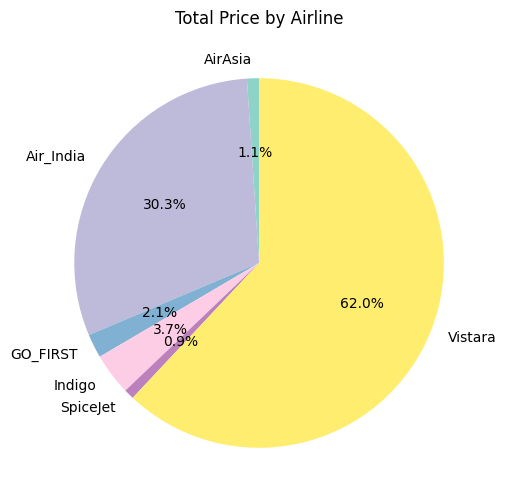

In [ ]:
airline_prices = df.groupby('airline')['price'].sum()

# Plot the pie chart
plt.figure(figsize=(8,6))
airline_prices.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.ylabel('')
plt.title('Total Price by Airline')
plt.show()

In [ ]:
df.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


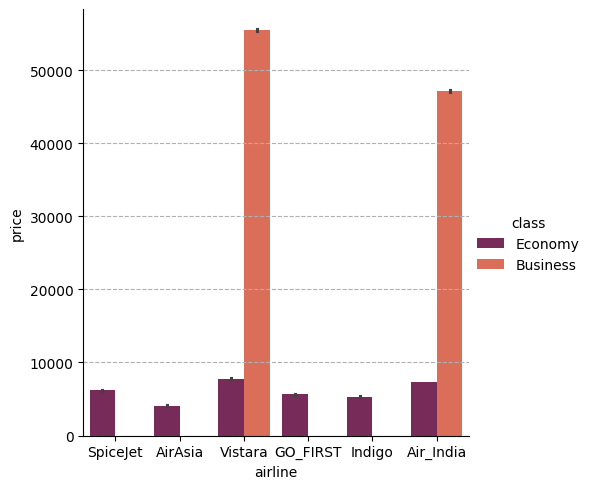

In [ ]:
sns.catplot(data=df, x='airline', y='price', kind='bar', palette='rocket', hue='class')
plt.grid(axis='y',linestyle="--")

#5. Investigate how flight prices change depending on the departure (source) and arrival (destination) cities to identify pricing trends.

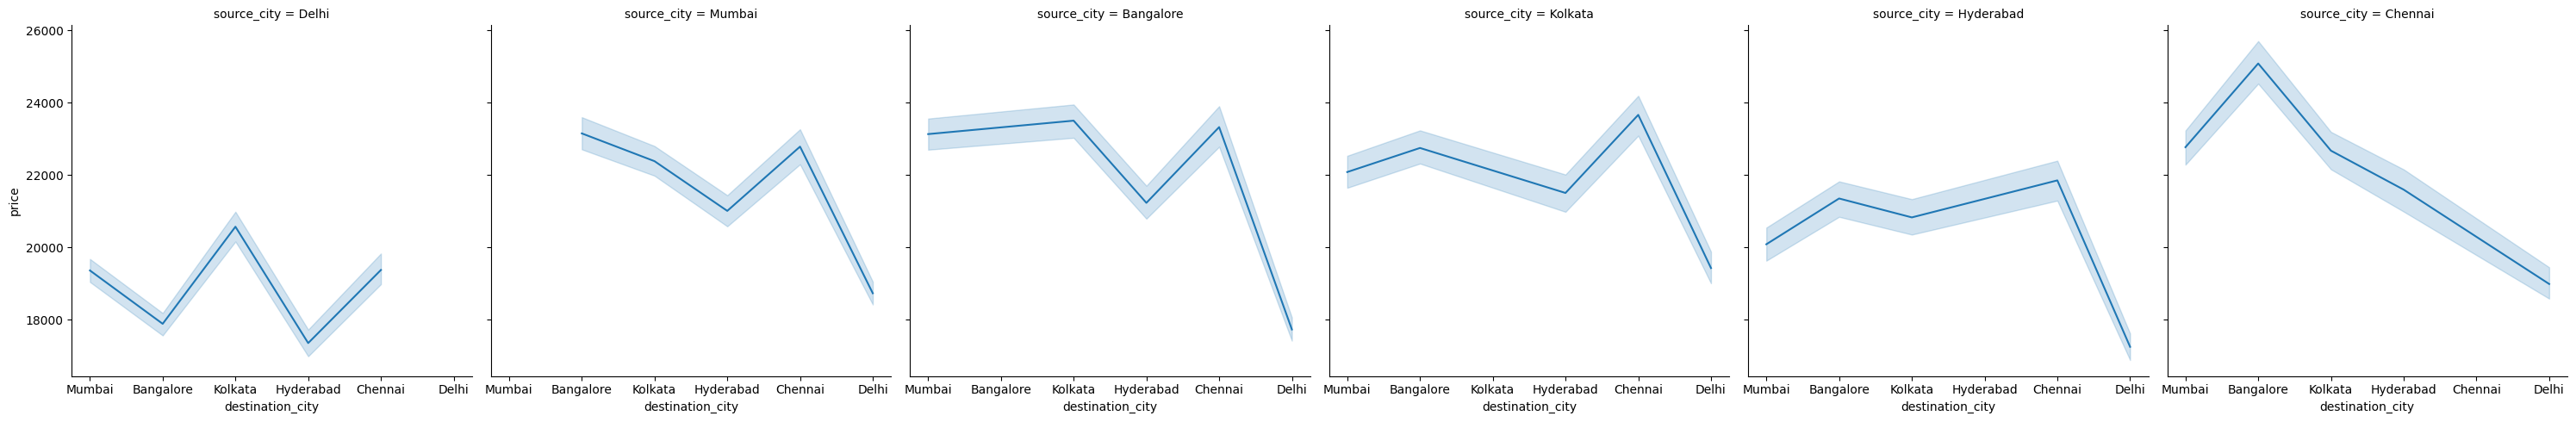

In [ ]:
sns.relplot(data=df, x='destination_city', y='price', col='source_city', kind='line')

#6. Study the relationship between ticket prices and the days remaining until departure to understand fare dynamics.

In [ ]:
 df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

to identify the change in price in relation to number of days left for the flight

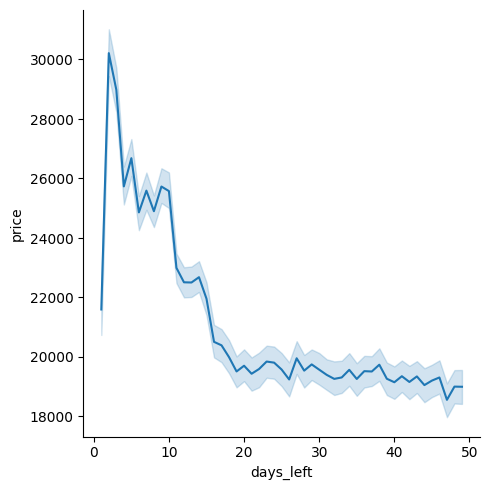

In [ ]:
sns.relplot(data=df, x='days_left', y='price', kind='line')